In [53]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from acoustics import Signal
from acoustics.standards.iso_tr_25417_2007 import peak_sound_pressure_level

In [106]:
def plot_impluse(time_s, singal, x_max=0.01):
    Peak_SPL = peak_sound_pressure_level(singal.values)
    fig, ax = plt.subplots(1, figsize=(6.5,5))
    ax.plot(time_s, singal.values)
    ax.set_xlim(0, x_max)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Pressure (Pa)")
    y_lim = ax.get_ylim()
    ax.text(x=x_max/5, y=y_lim[1]*2/3, s=f"Peak SPL = {round(Peak_SPL,2)} dB")
    plt.title("Example of Impulse")
    plt.show()

## Task 1

impulses with peak SPL of 145 dB at 1 Hz pulse repetition rate (total duration: 11 min 40 s);

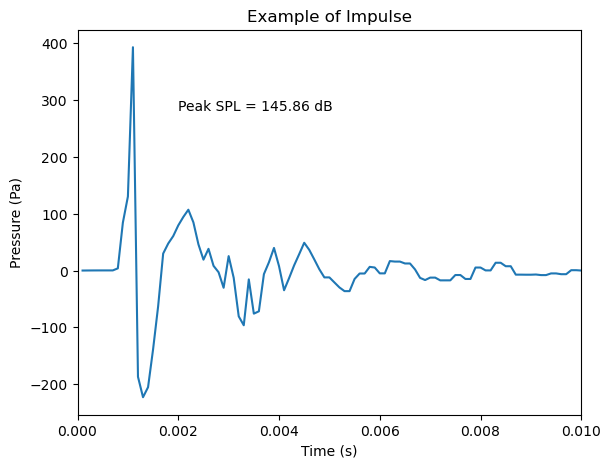

In [87]:
df = pd.read_excel("WaveinPaper.xlsx")
time_s_segment_1 = df.iloc[:,0].dropna().values / 1000
pressure_pa_segment_1 = df.iloc[:,1].dropna().values * 1000
fs_segment_1 = int(1 / np.mean(np.diff(time_s_segment_1)))
s_segment_1 = Signal(pressure_pa_segment_1, fs=fs_segment_1)

plot_impluse(time_s_segment_1, s_segment_1)

进行拼接，共700段

In [80]:
time_s_1 = np.array([])
pressure_pa_1 = np.array([])
for i in tqdm(range(700)):
    time_s_1 = np.hstack((time_s_1, time_s_segment_1 + i))
    pressure_pa_1 = np.hstack((pressure_pa_1, pressure_pa_segment_1))

100%|██████████| 700/700 [00:11<00:00, 61.01it/s] 


检查数值

In [83]:
n = 77
print(pressure_pa_1[n], pressure_pa_1[10000+n], pressure_pa_1[40000+n], pressure_pa_1[80000+n])

-14.833755665766 -14.833755665766 -14.833755665766 -14.833755665766


计算Leq，LAeq等值

In [82]:
fs_1 = int(1 / np.mean(np.diff(time_s_1)))
s_1 = Signal(pressure_pa_1, fs=fs_1)
Leq = s_1.leq()
LAeq = s_1.weigh("A").leq()
LCeq = s_1.weigh("C").leq()
Peak_SPL = peak_sound_pressure_level(s_1.values)
print(f"""
      Leq = {Leq}
      LAeq = {LAeq}
      LCeq = {LCeq}
      Peak SPL = {Peak_SPL}""")


      Leq = 110.19964820789198
      LAeq = 109.80005478072849
      LCeq = 109.63040746533378
      Peak SPL = 145.86355512632161


# Task 2

2.	impulses with peak SPL of 137 dB at 1 Hz pulse repetition rate (total duration: 8 min 20 s);

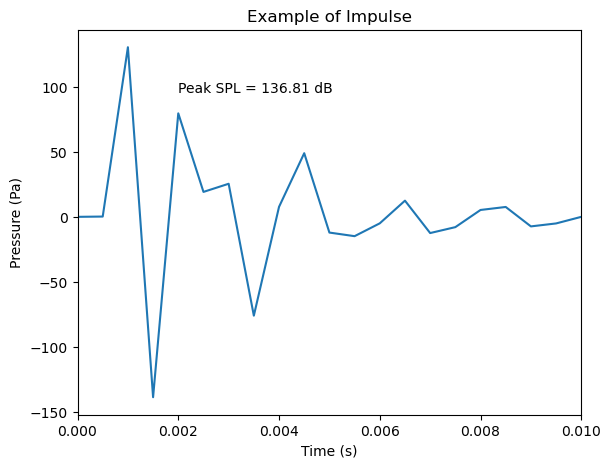

In [88]:
time_s_segment_2 = df.iloc[:,3].dropna().values / 1000
pressure_pa_segment_2 = df.iloc[:,4].dropna().values * 1000
fs_segment_2 = int(1 / np.mean(np.diff(time_s_segment_2)))
s_segment_2 = Signal(pressure_pa_segment_2, fs=fs_segment_2)

plot_impluse(time_s_segment_2, s_segment_2)

进行拼接，共500段

In [90]:
time_s_2 = np.array([])
pressure_pa_2 = np.array([])
for i in tqdm(range(500)):
    time_s_2 = np.hstack((time_s_2, time_s_segment_2 + i))
    pressure_pa_2 = np.hstack((pressure_pa_2, pressure_pa_segment_2))

100%|██████████| 500/500 [00:01<00:00, 445.54it/s] 


检查数值

In [104]:
n = 3
print(pressure_pa_2[n], pressure_pa_2[2001+n], pressure_pa_2[4002+n], pressure_pa_2[8004+n])

-138.451716814867 -138.451716814867 -138.451716814867 -138.451716814867


计算

In [105]:
fs_2 = int(1 / np.mean(np.diff(time_s_2)))
s_2 = Signal(pressure_pa_2, fs=fs_2)
Leq = s_2.leq()
LAeq = s_2.weigh("A").leq()
LCeq = s_2.weigh("C").leq()
Peak_SPL = peak_sound_pressure_level(s_2.values)
print(f"""
      Leq = {Leq}
      LAeq = {LAeq}
      LCeq = {LCeq}
      Peak SPL = {Peak_SPL}""")


      Leq = 108.17408263039223
      LAeq = 107.64983932506186
      LCeq = 107.31812568854676
      Peak SPL = 136.8053669949034


# Task 3

impulses with peak SPL of 163 dB and the pulse width is 0.25 s. The interval between two pulses is 6.5s, total 15 times.

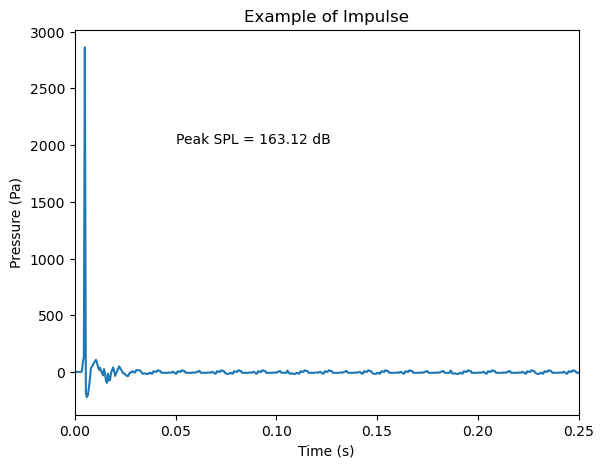

In [114]:
df = pd.read_excel("WaveinPaper.xlsx")
time_s_segment_3 = df.iloc[:,6].dropna().values / 1000
pressure_pa_segment_3 = df.iloc[:,7].dropna().values * 1000
fs_segment_3 = int(1 / np.mean(np.diff(time_s_segment_3)))
s_segment_3 = Signal(pressure_pa_segment_3, fs=fs_segment_3)

plot_impluse(time_s_segment_3, s_segment_3, x_max=0.25)

拼接，共15段

In [115]:
time_s_3 = np.array([])
pressure_pa_3 = np.array([])
for i in tqdm(range(15)):
    time_s_3 = np.hstack((time_s_3, time_s_segment_3 + i))
    pressure_pa_3 = np.hstack((pressure_pa_3, pressure_pa_segment_3))

100%|██████████| 15/15 [00:00<00:00, 1651.86it/s]


计算

In [116]:
fs_3 = int(1 / np.mean(np.diff(time_s_3)))
s_3 = Signal(pressure_pa_3, fs=fs_3)
Leq = s_3.leq()
LAeq = s_3.weigh("A").leq()
LCeq = s_3.weigh("C").leq()
Peak_SPL = peak_sound_pressure_level(s_3.values)
print(f"""
      Leq = {Leq}
      LAeq = {LAeq}
      LCeq = {LCeq}
      Peak SPL = {Peak_SPL}""")


      Leq = 121.9653892227761
      LAeq = 121.34252916816223
      LCeq = 120.56192270094203
      Peak SPL = 163.11531979992822


# 倍频程计算尝试

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functional import seq
from scipy.stats import kurtosis
from acoustics import Signal
from acoustics.signal import octaves
from acoustics.standards.iso_tr_25417_2007 import sound_pressure_level, peak_sound_pressure_level, peak_sound_pressure, equivalent_sound_pressure_level
import librosa

from matplotlib.font_manager import FontProperties
from matplotlib import rcParams

config = {
            "font.family": "serif",
            "font.size": 12,
            "mathtext.fontset": "stix",# matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
            "font.serif": ["STZhongsong"],# 华文中宋
            "axes.unicode_minus": False # 处理负号，即-号
         }
rcParams.update(config)


In [84]:
s = Signal.from_wav("./example_files/Gaussian.wav", normalize=False)

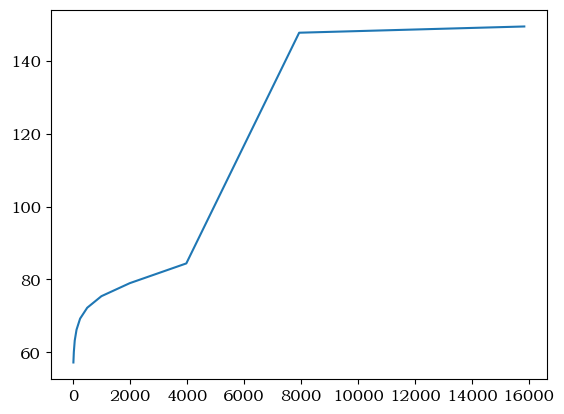

In [98]:
fob, level = octaves(s.values, s.fs)
plt.plot(fob.center, level)

In [63]:
y, sr = librosa.load("./example_files/Gaussian.wav", sr=None)

In [65]:
def calculate_leq(y, sr):
    # 计算时间长度（秒）
    duration = len(y) / float(sr)
    # 计算均方根(RMS)
    rms = np.sqrt(np.mean(np.square(y)))
    print(rms)
    # 参考声压级为20微帕 (μPa)
    reference_pressure = 20e-6
    # 计算Leq (dB)
    leq = 20 * np.log10(rms / reference_pressure)
    return leq, duration

leq, duration = calculate_leq(y, sr)
print(f"Leq: {leq} dB over a period of {duration:.2f} seconds")

0.023293806
Leq: 61.324209259691 dB over a period of 10.42 seconds


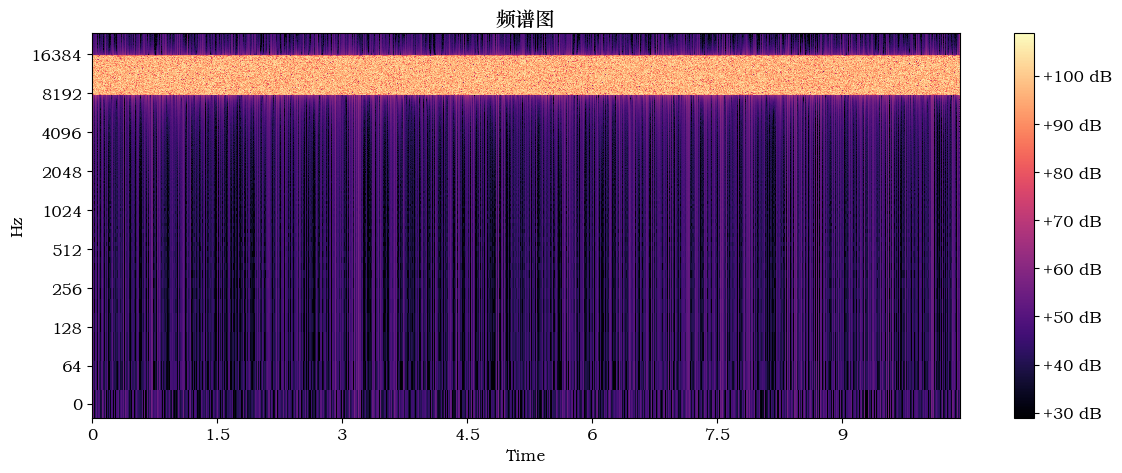

In [99]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 加载音频文件
filename = './example_files/Gaussian.wav'
y, sr = librosa.load(filename, sr=None)

# 如果是立体声，选择第一个声道进行分析
if y.ndim > 1:
    y = y[:, 0]

# 参数设置
n_fft = 1024  # FFT窗口长度
hop_length = 512  # 窗口移动步长
win_length = n_fft  # 窗口长度
window = 'hamming'  # 使用Hamming窗减少频谱泄漏

# 计算短时傅里叶变换(STFT)
D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window))

# 将幅度转换为分贝(dB)
DB = librosa.amplitude_to_db(D, ref=2.33e-7)

# 生成时间轴和频率轴
times = librosa.times_like(DB, sr=sr, hop_length=hop_length)
frequencies = librosa.fft_frequencies(sr=sr, n_fft=n_fft)

# 绘制频谱图
plt.figure(figsize=(14, 5))
librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('频谱图')
plt.show()

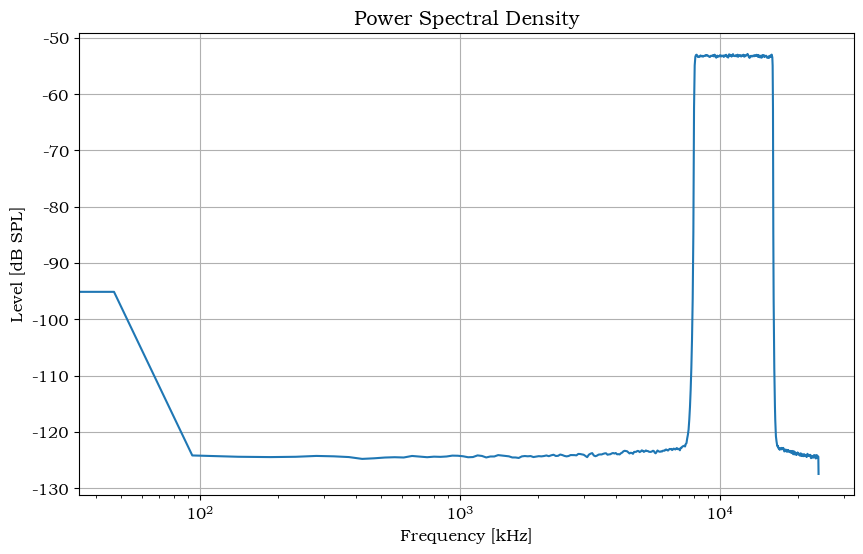

In [102]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import welch

# 1. 加载音频文件
filename = './example_files/Gaussian.wav'  # 替换为你的wav文件路径
y, sr = librosa.load(filename, sr=None)

# 如果是立体声，选择第一个声道进行分析
if y.ndim > 1:
    y = y[:, 0]

# 2. 计算功率谱密度
frequencies, power_density = welch(y, fs=sr, nperseg=1024, scaling="spectrum")
power_density = 10 * np.log10(power_density)

# 3. 绘制功率谱图
plt.figure(figsize=(10, 6))
plt.semilogx(frequencies, power_density)  # 使用对数刻度显示频率轴
plt.title('Power Spectral Density')
plt.xlabel('Frequency [kHz]')
plt.ylabel('Level [dB SPL]')
plt.grid(True)
plt.show()

In [77]:
frequencies.shape

(513,)

In [79]:
times.shape

(977,)